# Update layer symbology across web maps

Listing this article by Earl here to remember: https://community.esri.com/t5/arcgis-api-for-python-blog/methods-for-updating-layer-symbology-with-the/ba-p/902923

In [ ]:
from arcgis.gis import GIS
from arcgis.apps.itemgraph import ItemGraph, create_dependency_graph
from getpass import getpass

In [2]:
gis = GIS('https://www.arcgis.com', 'tkinlaw', getpass(), verify_cert=False)
gis

Setting `verify_cert` to False is a security risk, use at your own risk.


GIS @ https://kinlaw.maps.arcgis.com version:2025.3

<Item title:"USA Regions_WFL1" type:Feature Layer Collection owner:tkinlaw>
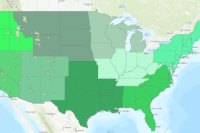

In [3]:
sourceItem = gis.content.get('7aa5219eeb5645ee90a8dfb83cc64890')
sourceItem

<Item title:"USA Regions" type:Web Map owner:tkinlaw>
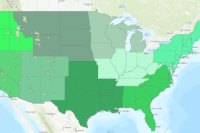

In [4]:
item = gis.content.get('26ce5bf234324d21a294fda40cf24aad')
item

## Search for all web maps, then filter for those using the feature layer

In [10]:
dependentDict = {}
for usedItem in item.get_dependencies():
    if usedItem.id == sourceItem.id:
        dependentDict[item.id] = usedItem
    else:
        continue
print(dependentDict)

{'26ce5bf234324d21a294fda40cf24aad': <Item title:"USA Regions_WFL1" type:Feature Layer Collection owner:tkinlaw>}


In [ ]:
for webmapID in dependentDict.keys():
    webmap = gis.content.get(webmapID)

In [20]:
import arcgis

In [23]:
myMap = arcgis.map.Map(item=item, gis=gis)

In [ ]:
myMap.

TypeError: 'LayerList' object is not callable

In [ ]:
for thing in item.get_data()['operationalLayers']:
    if 'https://services9.arcgis.com/jO1WGLJL8KkEqHPJ/arcgis/rest/services/USA_Regions_WFL1/FeatureServer/1' in thing.values():
        print("It's here")
    else:
        print('Not it')

It's here
Not it


<Item title:"USA Regions" type:Web Map owner:tkinlaw>
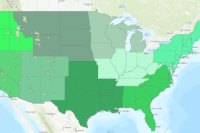

In [37]:
item.get_data()['operationalLayers'][0]

{'itemId': '7aa5219eeb5645ee90a8dfb83cc64890',
 'id': '1b0d6b083a2940fa84a77c661aedefd4',
 'title': 'U.S. State Regions',
 'visibility': True,
 'blendMode': 'normal',
 'opacity': 1,
 'url': 'https://services9.arcgis.com/jO1WGLJL8KkEqHPJ/arcgis/rest/services/USA_Regions_WFL1/FeatureServer/1',
 'layerType': 'ArcGISFeatureLayer',
 'layerDefinition': {'geometryType': 'esriGeometryPolygon',
  'objectIdField': 'FID'},
 'popupInfo': {'title': '{expression/displayExp}',
  'showLastEditInfo': False,
  'mediaInfos': [],
  'popupElements': [{'fieldInfos': [{'fieldName': 'FID',
      'isEditable': False,
      'format': {'places': 0, 'digitSeparator': False},
      'visible': True,
      'label': 'FID'},
     {'fieldName': 'OBJECTID',
      'isEditable': True,
      'format': {'places': 6, 'digitSeparator': False},
      'visible': True,
      'label': 'OBJECTID'},
     {'fieldName': 'STATE_NAME',
      'isEditable': True,
      'visible': True,
      'label': 'STATE_NAME'},
     {'fieldName': 'SU